# Active Brownian Particles


In [186]:
# Import
from os import lstat
import matplotlib.pyplot as plt
import numpy as np
import math
from example import ABP_2d


ImportError: dlopen(/Users/albertobassi/Documents/Active-Brownian-Particles/src/example.cpython-38-darwin.so, 0x0002): tried: '/Users/albertobassi/Documents/Active-Brownian-Particles/src/example.cpython-38-darwin.so' (mach-o file, but is an incompatible architecture (have 'arm64', need 'x86_64')), '/usr/local/lib/example.cpython-38-darwin.so' (no such file), '/usr/lib/example.cpython-38-darwin.so' (no such file)

In [175]:
# Load files
par = open("parameters.txt")
dynamics = np.loadtxt("dynamics.txt")
bool_dynamics = np.loadtxt("bool_dynamics.txt")

# Create parameter dictionsry
par_dict = {}
for line in par:
    key, value = line.split()
    par_dict[key] = float(value)

# Take x and y positions
x_dyn = dynamics[:,0]
y_dyn = dynamics[:,1]

# Take start and finish points
x_start = x_dyn[0]
y_start = y_dyn[0]
x_end = x_dyn[-1]
y_end = y_dyn[-1]

# compute maximum
x_max = max(x_dyn)
x_min = min(x_dyn)
y_max = max(y_dyn)
y_min = min(y_dyn)

print(x_max, x_min, y_max, y_min)
L = par_dict["L"]
dt = par_dict["dt"]

0.124997 -0.125 0.124998 -0.124999


## Potential plot

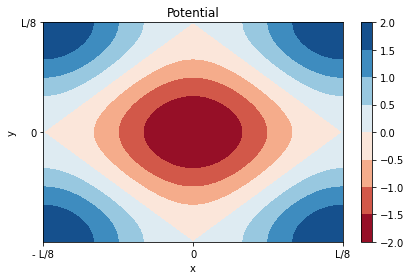

In [117]:
### Contour plot of potential
# Define potential function
def potential(x, y):
    return par_dict["k"]*(np.sin(8*math.pi*(x +3./16.*par_dict["L"])/par_dict["L"]) + np.sin(8*math.pi*(y+3./16.*par_dict["L"])/par_dict["L"]))

# Mesh grid
x = np.linspace(-L/8, L/8, 1000)
y = np.linspace(-L/8, L/8, 1000)
xx, yy = np.meshgrid(x, y)

# Potential
zz = potential(xx,yy)

# Plot
cf = plt.contourf(xx,yy, zz, cmap ="RdBu")
plt.colorbar()

# Rendering
plt.title("Potential")
plt.xlabel("x")
plt.ylabel("y")
x_ticks = [-L/8, 0, L/8 ]
x_labels = ["- L/8","0", "L/8" ]
y_ticks = [0, L/8]
y_labels = ["0", "L/8"]
plt.xticks(x_ticks, x_labels)
plt.yticks(y_ticks, y_labels)
#plt.legend()
plt.tight_layout()
plt.savefig("potential.png")

## Transition probability density

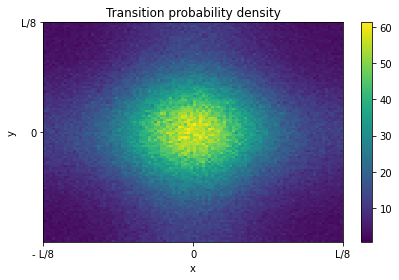

In [118]:
### Plotting
# Contourf and dynamics

h = plt.hist2d(x_dyn, y_dyn, bins = 100 ,density = True)
plt.colorbar()
#plt.plot(x_start, y_start, c = "blue", marker = "o", ms = 10, ls  = "",label = "Start" )
#plt.plot(x_end, y_end, c = "red", marker = "o", ms = 10, ls  = "",label = "End" )

# Rendering
plt.title("Transition probability density")
plt.xlabel("x")
plt.ylabel("y")
x_ticks = [-L/8, 0, L/8 ]
x_labels = ["- L/8","0", "L/8" ]
y_ticks = [0, L/8]
y_labels = ["0", "L/8"]
plt.xticks(x_ticks, x_labels)
plt.yticks(y_ticks, y_labels)
#plt.legend()
plt.tight_layout()
plt.savefig("prob_density.png")


## Transition times

In [119]:
# Masks
reactant_dyn = bool_dynamics[:,0]
target_dyn = bool_dynamics[:,1]

is_inside_reactant = reactant_dyn == 1
is_inside_target = target_dyn ==1

print(is_inside_reactant)

[ True  True  True ... False False False]


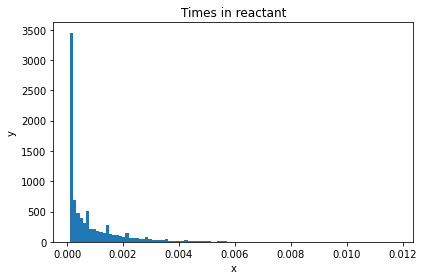

In [185]:
# Times outside reactant
out_reactant = np.where(reactant_dyn==1)[0]
out_reactant = np.array([out_reactant[i]-out_reactant[i-1]-1 for i in range(1,len(out_reactant)) ])
out_reactant = out_reactant[out_reactant!=0]


# Times inside reactant
in_reactant = np.where(reactant_dyn==0)[0]
in_reactant = np.array([in_reactant[i]-in_reactant[i-1]-1 for i in range(1,len(in_reactant)) ])
in_reactant = in_reactant[in_reactant!=0]
in_reactant = in_reactant*dt




In [120]:
# Count consecutive 1s in list a 

def cc_ones(a):
    seq = a.copy()
    np.append(seq,[0])
    ones = []
    print(SEQ)
    num = a[0]
    for next in seq[1:]:
        count = 0
        if num==1 and next==1:
            count += 1
        elif num==1 and next==0:
            count +=1
            ones.append(count)
            count = 0
        num = next
            

